In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv("/content/Admission_Predict_Ver1.1.csv")
df.shape
df.isnull().sum()
df.columns
df=df.drop('SerialNo', axis = 1)
y = (df['Admit'] >= 0.75).astype(int)
df_without_outcome = df.drop("Admit", axis = 1)
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(df_without_outcome)
pca.get_covariance()
explained_variance = pca.explained_variance_ratio_
explained_variance


array([9.29867063e-01, 5.76314716e-02, 7.07779605e-03, 2.37674260e-03,
       1.62317908e-03, 9.78376087e-04, 4.45371526e-04])

In [50]:
loadings = pd.DataFrame(
    pca.components_,  # each row = PC, each column = original feature weights
    columns=df_without_outcome.columns,
    index=[f'PC{i+1}' for i in range(len(df_without_outcome.columns))]
)

# Show contributions for all PCs
print(loadings)

# Optional: just see PC1 contributions
print("\nFeature contributions to PC1:")
print(loadings.loc['PC1'].sort_values(ascending=False))

          GRE     TOEFL  University       SOP       LOR      CGPA  Research
PC1  0.896124  0.432276    0.060569  0.050980  0.040606  0.041073  0.022279
PC2 -0.440722  0.892134    0.059880  0.060030  0.043513  0.025954 -0.010211
PC3 -0.042631 -0.128401    0.635784  0.542023  0.512474  0.132914  0.058227
PC4  0.003137  0.004154   -0.670314  0.079285  0.736433  0.043549  0.011631
PC5  0.001993 -0.010347   -0.366601  0.827582 -0.423148  0.016527 -0.035683
PC6 -0.022483  0.005982   -0.044436 -0.005713 -0.056412  0.015149  0.997015
PC7 -0.019754 -0.024217   -0.053223 -0.093796 -0.096220  0.988723 -0.023677

Feature contributions to PC1:
GRE           0.896124
TOEFL         0.432276
University    0.060569
SOP           0.050980
CGPA          0.041073
LOR           0.040606
Research      0.022279
Name: PC1, dtype: float64


In [34]:
df=df[['GRE', 'TOEFL', 'CGPA', 'SOP']]
#preprocessing/normalizing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 10))
df[['GRE', 'TOEFL', 'CGPA', 'SOP']] = scaler.fit_transform(df[['GRE', 'TOEFL', 'CGPA', 'SOP']])
df

,GRE,TOEFL,CGPA,SOP
0,9.4,9.285714,9.134615,8.75
1,6.8,5.357143,6.634615,7.50
2,5.2,4.285714,3.846154,5.00
3,6.4,6.428571,5.993590,6.25
4,4.8,3.928571,4.519231,2.50
...,...,...,...,...
495,8.4,5.714286,7.115385,8.75
496,9.4,8.928571,9.839744,10.00
497,8.0,10.000000,8.846154,8.75
498,4.4,3.928571,5.224359,7.50


In [35]:
#bins
#sop
Newsop = pd.Series(["verypoor", "poor", "Mid","good","impressive"], dtype = "category")
df['Newsop'] = Newsop
df.loc[df["SOP"] <= 2, "Newsop"] = Newsop[0]
df.loc[(df["SOP"] > 2) & (df["SOP"] <= 4), "Newsop"]=Newsop[1]
df.loc[(df["SOP"] > 4) & (df["SOP"] <= 6), "Newsop"]=Newsop[2]
df.loc[(df["SOP"] > 6) & (df["SOP"] <= 8), "Newsop"]=Newsop[3]
df.loc[df["SOP"] > 8 ,"Newsop"] = Newsop[4]
df.head()

,GRE,TOEFL,CGPA,SOP,Newsop
0,9.4,9.285714,9.134615,8.75,impressive
1,6.8,5.357143,6.634615,7.50,good
2,5.2,4.285714,3.846154,5.00,Mid
3,6.4,6.428571,5.993590,6.25,good
4,4.8,3.928571,4.519231,2.50,poor


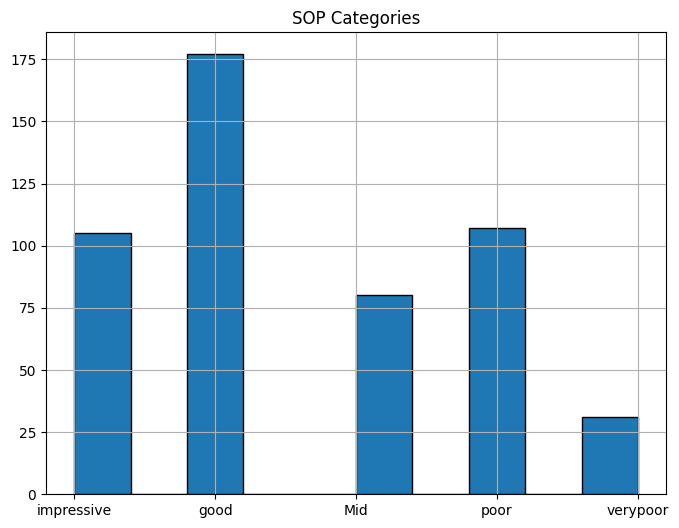

In [36]:
fig, ax = plt.subplots(figsize=(8, 6))
df['Newsop'].hist(ax=ax, edgecolor="black")
ax.set_title("SOP Categories")
plt.show()

In [69]:
df = df[['GRE', 'TOEFL', 'CGPA', 'SOP']]
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
xtrain,xtest,ytrain,ytest = train_test_split(df,y,test_size=0.4, random_state=0)
model = LogisticRegression()
model.fit(xtrain,ytrain)
ypred = model.predict(xtest)
ypred

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0])

In [70]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print('Model accuracy score: {0:0.4f}'.
format(accuracy_score(ytest, ypred)))
print("Confusion Matrix:\n", confusion_matrix(ytest, ypred))
print("Classification Report:\n", classification_report(ytest, ypred))

Model accuracy score: 0.9000
Confusion Matrix:
 [[112   9]
 [ 11  68]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.93      0.92       121
           1       0.88      0.86      0.87        79

    accuracy                           0.90       200
   macro avg       0.90      0.89      0.89       200
weighted avg       0.90      0.90      0.90       200



In [74]:

import pandas as pd

# Sample new student data — same feature order as your training data
sample_data = pd.DataFrame({
    'GRE': [330, 310, 290],
    'TOEFL': [115, 100, 90],
    'CGPA': [9.2, 8.0, 7.0],
    'SOP': [4.5, 3.0, 2.0]
})

# Make sure columns are in same order as model training
sample_data = sample_data[['GRE', 'TOEFL', 'CGPA', 'SOP']]

# Predict admission outcome
sample_predictions = model.predict(sample_data)

# If you used logistic regression (binary admit / not admit):
print("Predicted Admission (1 = Admit, 0 = Not Admit):")
print(sample_predictions)

# If you want probabilities:
if hasattr(model, "predict_proba"):
    sample_probabilities = model.predict_proba(sample_data)
    print("\nAdmission Probability:")
    print(sample_probabilities)


Predicted Admission (1 = Admit, 0 = Not Admit):
[1 0 0]

Admission Probability:
[[2.29081951e-02 9.77091805e-01]
 [9.70541197e-01 2.94588032e-02]
 [9.99934944e-01 6.50560171e-05]]
